In [75]:
import matplotlib.pyplot as plt
from IPython.display import Image

import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
import torch.nn.functional as F

from dataset_mod import MyDataset, default_loader
from torch.utils.data import DataLoader
import torchvision
from solver import reconstruction_loss, kl_divergence, to_var
from model import conv_VAE

from visuals import traverse_z

%load_ext autoreload
%autoreload 2

#image_paths = "/Volumes/RCONCI/2 digits fixed offset/test/orig/"
#target_paths = "/Volumes/RCONCI/2 digits fixed offset/test/inverse/"
#image_paths = "/Volumes/RCONCI/2 digits colours/test/orig/"
#target_paths = "/Volumes/RCONCI/2 digits colours/test/inverse/"
#image_paths = "/Users/riccardoconci/Desktop/code/Zuckerman_Project/Dataset/digts/train/orig/" 
#target_paths = "/Users/riccardoconci/Desktop/code/Zuckerman_Project/Dataset/digts/train/inverse/" 
image_paths = "/Volumes/RCONCI/2_dig_fixed_random_bw/digts/train/orig/"
target_paths = "/Volumes/RCONCI/2_dig_fixed_random_bw/digts/train/inverse/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
dset = MyDataset
train_data = dset(image_paths,target_paths, image_size= 32)
train_data.__len__()


9800

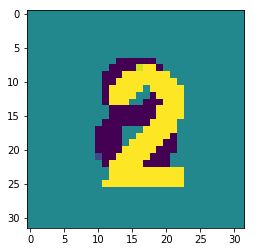

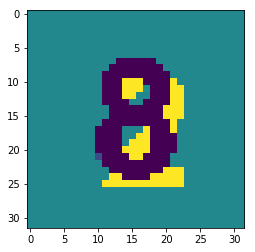

In [78]:
x, y = train_data.__getitem__(60)
plt.imshow(x[0,:,:])
plt.figure()
plt.imshow(y[0,:,:])
plt.show()

In [88]:
batch_size= 64
num_workers = 0
train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=num_workers,
                          pin_memory=False,
                          drop_last=False)

In [89]:
for idx, (x, y) in enumerate(train_loader):
    print(idx)
    print(x.shape)
    #plt.figure()
    #plt.imshow(x[0,0,:,:])
    #plt.show()
    print(y.shape)
    #plt.figure()
    #plt.imshow(y[0,0,:,:])
    #plt.show()
    
    if idx >= 3:
        print(idx)
        break

0
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])


KeyboardInterrupt: 

In [90]:
vae = conv_VAE(z_dim=22)
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)

In [92]:
epochs = 250
beta = 1

for epoch in range(epochs):
    for idx, (x, y) in enumerate(train_loader):
        x = to_var(x)
        #x = Variable(cuda(x, self.use_cuda))
        x_recon, mu, logvar = vae(x)
        recon_loss = reconstruction_loss(y, x_recon, 'gaussian')
        total_kld, dim_wise_kld, mean_kld = kl_divergence(mu, logvar)
        
        beta_vae_loss = recon_loss + beta*total_kld

        optimizer.zero_grad()
        beta_vae_loss.backward()
        optimizer.step()
        
        if idx%100 == 0:
            print("Epoch[{}/{}] Loss: {:.3f}".format(epoch+1, epochs, beta_vae_loss.data[0]/batch_size))
    
            #recon_x, _, _ = vae(fixed_x)
            #save_image(recon_x.view(recon_x.size(0), 1, 28, 28).data.cpu(), f'reconstructed/recon_image_{epoch}_{idx}.png')

Epoch[1/250] Loss: 1.062
Epoch[1/250] Loss: 0.676
Epoch[2/250] Loss: 0.705
Epoch[2/250] Loss: 0.676
Epoch[3/250] Loss: 0.705
Epoch[3/250] Loss: 0.676
Epoch[4/250] Loss: 0.705
Epoch[4/250] Loss: 0.676
Epoch[5/250] Loss: 0.705
Epoch[5/250] Loss: 0.676
Epoch[6/250] Loss: 0.705
Epoch[6/250] Loss: 0.676


OSError: [Errno 6] Device not configured

In [ ]:
sample = torch.randn(16, 20)
test_recon = vae._decode(sample)
# recon_x, _, _ = vae(fixed_x)
#test_recon= test_recon.detach().numpy()

torchvision.utils.save_image(abs(test_recon.view(test_recon.size(0), 1, 64, 64).data.cpu()), 'sample_image.png')
Image('sample_image.png')

In [46]:
vis = traverse_z(vae)

In [47]:
vis.create_plots()

20

In [32]:
import imageio

z_dim = 20
num_frames=20
indexs = np.arange(0, num_frames*z_dim, z_dim)

import os
import numpy as np

for i in indexs:
    images = []
    for e in range(num_frames):
        #print(i+e)
        filename = 'traversals/z{}/img{}.png'.format(int(i/num_frames),e)
        directory = os.path.dirname(filename)
        if not os.path.exists(directory):
            os.makedirs(directory)
        torchvision.utils.save_image(F.sigmoid(reconst[i+e,0,:,:].cpu()) , filename)
        
        images.append(imageio.imread(filename))
    filename_2 = 'traversals_gifs/traversing_z_{}.gif'.format(int(i/z_dim),int(i/z_dim))
    directory_2 = os.path.dirname(filename_2)
    if not os.path.exists(directory_2):
            os.makedirs(directory_2)
    imageio.mimsave('traversals_gifs/traversing_z_{}.gif'.format(int(i/z_dim),int(i/z_dim)), images)


NameError: name 'reconst' is not defined